## 계층적 군집(1)

##### Hierarchical Clustering
###### 계층적 군집분석은 데이터와 데이터 , 군집과 데이터 , 군집과 군집 간의 거리에 대한 유사도로 군집을 형성

##### 동작하는 방식
###### 두 점 사이클 가까운 것끼리 합침, 이 과정을 반복하여 전체가 하나의 클러스터에 속할 때까지 반복.
> ###### 이 과정에 대한 시각화 결과물이 덴드로그램 형태로 나타남
###### 어떻게 두 점 사이의 거리를 결정할 지에 대한 측정 방식이 필요 
> ###### 유클리디안 거리 측정(직선거리), 맨해튼 거리 측정 방식(블록거리)

##### 군집간의 거리를 구하는 방법
##### 1. Min(Single Link)
###### 군집과 군집의 거리를 구할 때 가장 최소 거리인 것을 유사도로 측정하는 방식
![res/그림3.png](res/그림3.png)
##### 2. Max(Complete Link)
###### 군집과 군집의 거리를 구할 때 가장 최대인 것을 유사도로 측정하는 방식
![res/그림4.png](res/그림4.png)
##### 3. Average Link
###### 군집과 군집의 거리를 구할 때 거리의 평균을 구해 유사도로 측정하는 방식
![res/그림5.png](res/그림5.png)
##### 4. Centroids
###### 군집과 군집의 거리를 구할 때 데이터의 중심점 거리를 유사도로 측정하는 방식
![res/그림1.png](res/그림1.png)
##### 5. Ward's method
###### 두개의 군집이 병합되었을 떄 증가하는 변동성의 양으로 유사도를 측정하는 방식
##### 변동성
###### 두 군집의 중앙값과 두 군집에 있는 모든 데이터와의 거리의 합에서 군집간에 형성되는 거리를 뺀 값
![res/그림2.png](res/그림2.png)
> ###### 세부 군집 알고리즘으로 Agglomerative Hierarchical Clustering, Divisive Hierarchical Clustering 이 있다.

#### #01. 패키지 참조

In [1]:
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# sklearn은 AgglomerativeClustering() 함수를 제공한다.
from sklearn.cluster import AgglomerativeClustering

#### #02. 샘플 데이터를 통한 군집 실험

1. 실습 데이터 준비

In [2]:
x = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91],])
x

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

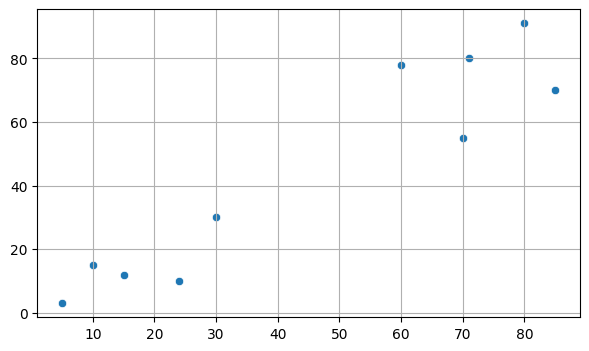

In [3]:
plt.figure(figsize=(7, 4))
sb.scatterplot(x=x[:,0], y=x[:,1])
plt.grid()
plt.show()
plt.close()

2. 계층 군집 수행
##### method 파라미터
##### 군집간의 거리를 구하는 방법
###### single , complete , average , weighted , centroid 중 선택
> ###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

##### metric 파라미터
> ###### scipy.sptial.distance.pdist 클래스의 인스턴스
- euclidean : 점 사이의 직선거리 측정
- cityblock : 점 사이의 맨하탄 거리 측정(블록)
- seuclidean : 표준화 된 유클리디안
- sqeuclidean : 제곱된 유클리디안
- cosine : 코사인 거리 계산
- 콜백함수 지정 가능함
> ###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy-spatial-distance-pdist

In [4]:
lnk = linkage(x, method='single', metric='euclidean')
lnk

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

군집 결과 시각화

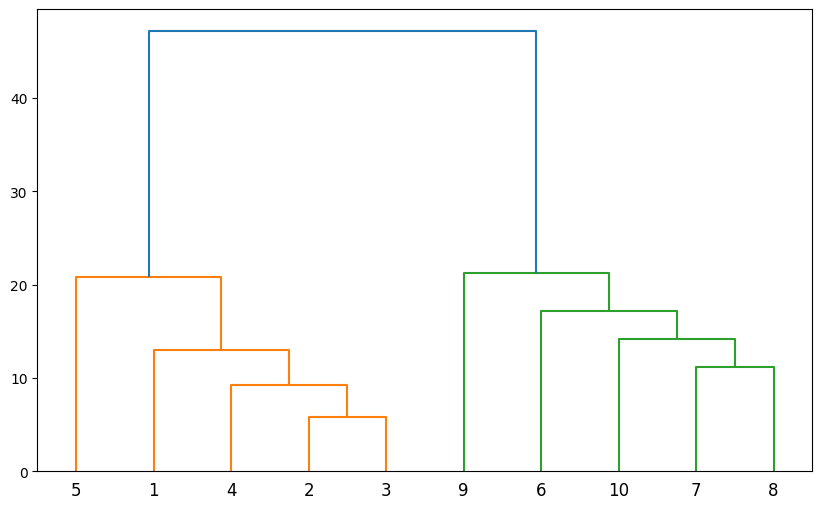

In [5]:
plt.figure(figsize=(10, 6))
dendrogram(lnk,
            orientation='top', # 방향: top(기본값), bottom, left, right
            labels=range(1, 11), # 라벨 인덱스
            # 각 노드 n에 대해 두 하위 링크가 표시되는 순서
            # False: 아무것도 안함(기본값)
            # 'ascending': 클러스터에 원본 개체수가 가장 적은 하위 객체가 먼저 출력
            # `descending`: 클러스터에 원본 개체수가 가장 많은 하위 객체가 먼저 출력
            count_sort='ascending',
            # 각 노드 n에 대해 두 하위 링크가 표시되는 순서
            # False: 아무것도 안함(기본값)
            # 'ascending': 직계 자손의 사이의 거리가 최소인 하위 항목이 먼저 표시됨
            # `descending`: 직계 자손의 사이의 거리가 최대인 하위 항목이 먼저 표시됨
            distance_sort='ascending',
            show_leaf_counts=True, # True: 맨 아래에 노드에 속한 개체 수 표시(k>1 경우만...)
)
plt.show()
plt.close()


#### #03. 병합군집 (sklearn)

1. 학습 모델 구현

In [6]:
ac = AgglomerativeClustering(
        # 찾아야 할 클러스터 수
        n_clusters=2,
        # 클러스터 간 거리를 측정하는 방법(euclidean, cityblock, manhattan, cosine)
        # `affinit`파라미터는 sklearn 1.4.0 버전부터 사용 불가.
        metric='euclidean',
        # ‘ward’(기본값), ‘complete’, ‘average’, ‘single’
        linkage='single',
        # 노드간의 거리 계산값을 저장할지 여부 (시각화를 위해서는 필수 적용)
        compute_distances=True)
clustering = ac.fit(x)
clustering

AgglomerativeClustering(compute_distances=True, linkage='single',
                        metric='euclidean')

2. 군집 결과 확인

In [7]:
labels = clustering.labels_
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

3. 노드간의 거리 확인
###### 학습 모델 객체 생성 단계에서 반드시 compute_distances=True 가 설정되어야만 한다.

In [8]:
clustering.distances_

array([ 5.83095189,  9.21954446, 11.18033989, 13.        , 14.2126704 ,
       17.20465053, 20.88061302, 21.21320344, 47.16990566])

4. 군집 결과 시각화

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [20.0, 20.0, 35.0, 35.0],
  [5.0, 5.0, 27.5, 27.5],
  [16.25, 16.25, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [65.0, 65.0, 87.5, 87.5],
  [55.0, 55.0, 76.25, 76.25],
  [30.625, 30.625, 65.625, 65.625]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [5.830951894845301, 9.219544457292887, 9.219544457292887, 0.0],
  [0.0, 13.0, 13.0, 9.219544457292887],
  [13.0, 20.8806130178211, 20.8806130178211, 0.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [11.180339887498949, 14.212670403551895, 14.212670403551895, 0.0],
  [0.0, 17.204650534085253, 17.204650534085253, 14.212670403551895],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [20.8806130178211,
   47.16990566028302,
   47.16990566028302,
   21.213203435596427]],
 'ivl': ['0', '1', '2', '3', '4', '8', '5', '6', '7', '9'],
 'leaves': [0, 1, 2, 3, 4, 8, 5, 6, 7, 9],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C

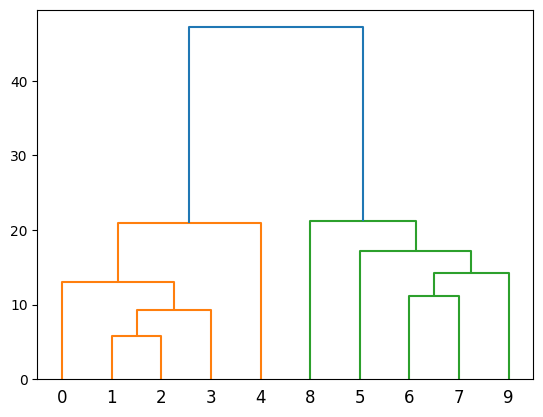

In [9]:
counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)
for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
linkage_matrix = np.column_stack(
[clustering.children_, clustering.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
dendrogram(linkage_matrix)


In [10]:
def get_dendrogram_data(clustering):
    counts = np.zeros(clustering.children_.shape[0])
    n_samples = len(clustering.labels_)

    for i, merge in enumerate(clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
    ).astype(float)
    # 시각화에 필요한 배열 리턴
    return linkage_matrix


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [20.0, 20.0, 35.0, 35.0],
  [5.0, 5.0, 27.5, 27.5],
  [16.25, 16.25, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [65.0, 65.0, 87.5, 87.5],
  [55.0, 55.0, 76.25, 76.25],
  [30.625, 30.625, 65.625, 65.625]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [5.830951894845301, 9.219544457292887, 9.219544457292887, 0.0],
  [0.0, 13.0, 13.0, 9.219544457292887],
  [13.0, 20.8806130178211, 20.8806130178211, 0.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [11.180339887498949, 14.212670403551895, 14.212670403551895, 0.0],
  [0.0, 17.204650534085253, 17.204650534085253, 14.212670403551895],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [20.8806130178211,
   47.16990566028302,
   47.16990566028302,
   21.213203435596427]],
 'ivl': ['0', '1', '2', '3', '4', '8', '5', '6', '7', '9'],
 'leaves': [0, 1, 2, 3, 4, 8, 5, 6, 7, 9],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C

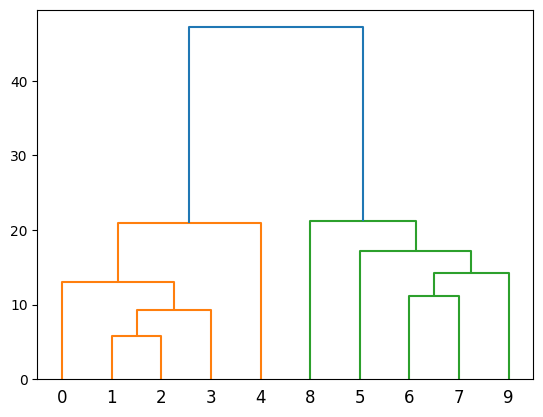

In [11]:
data = get_dendrogram_data(clustering)
dendrogram(data)